# Лабораторная работа 4

Деревья решений

Выполнил: 6132, Баканов Д.С.

*1 Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.*

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve # так как датасет для бинарной классификации
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Описание датасета

### Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
# считаем набор данных и рассмотрим его первые 5 элементов
cancer_df = pd.read_csv("./data/breast_cancer_wisconsin.csv")
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_df.shape  # размер набора данных

(569, 33)

In [4]:
cancer_df.nunique() #  количество уникальных значений

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [5]:
cancer_df.info() # сводная информация о значениях признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer_df = cancer_df.drop(columns=["Unnamed: 32"], axis=1) # удалим непонятную колонку, которая возникла при считывании датасета

In [7]:
cancer_df.isnull().sum()  # количество пропущенных значений

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

__Описание набора данных__

| Признак           | Описание                                                       | Тип            |
|-------------------|----------------------------------------------------------------|----------------|
| id                | ID пациента                                                    | числовой       |
| diagnosis         | Диагноз опухоли: доброкачественная (M) или злокачественная (B) | категориальный |
| radius            | Средний радиус опухоли                                         | числовой       |
| texture           | Cтандартное отклонение значений шкалы серого                   | числовой       |
| perimeter         | Cредний размер основной опухоли                                | числовой       |
| area              | Средняя площадь опухоли                                        | числовой       |
| smoothness        | Cреднее локальное изменение длины радиуса                      | числовой       |
| compactness       | Cреднее значение периметра ^ 2 / площадь - 1,0                 | числовой       |
| concavity         | Cреднее значение выраженности вогнутых участков контура        | числовой       |
| concave_points    | Cреднее число вогнутых частей контура                          | числовой       |
| symmetry          | Средняя симметрия опухоли                                      | числовой       |
| fractal_dimension | Значение средней длины участка разделяющей линии - 1           | числовой       |

Среди данных приведены признаки с приставками:

* mean - в среднем случае;
* se - со стандартной ошибкой случай;
* worst - в "худшем" или наибольшее значение признака.

## Задания:

*1.0 Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`*

In [8]:
# так как diagnosis - это целевой признак, то нам больше подходит pd.factorize
cancer_without_categories = cancer_df.copy()
codes, uniques = pd.factorize(cancer_without_categories["diagnosis"])
print(uniques)
cancer_without_categories["diagnosis"] = codes

Index(['M', 'B'], dtype='object')


Закодировав целевую переменную, переобозначим значения:

* Злокачественная опухоль (M) - 0.
* Доброкачественная опухоль (B) - 1.

In [9]:
cancer_without_categories

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# уберем из нбора данных столбец "id", так как он не несет никакой нагрузки
cancer_without_categories = cancer_without_categories.drop(columns=["id"], axis=1)

Подготовим данные к обучению, отделив целевой признак от остальных

In [11]:
y = cancer_without_categories["diagnosis"]
X = cancer_without_categories.drop(columns=['diagnosis'], axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

*1.1 С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)*

In [13]:
# применим StandardScaler
standard_scaler = StandardScaler()
X_scaler = standard_scaler.fit_transform(X)

In [14]:
# разделим выборку на обучающую и тестовую
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_scaler, y, random_state=0, test_size=0.5)

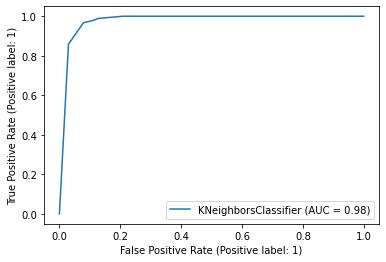

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_knn_train, y_knn_train)
plot_roc_curve(knn_model, X_knn_test, y_knn_test)

*1.2 То же самое и использованием `sklearn.pipeline.Pipeline`*

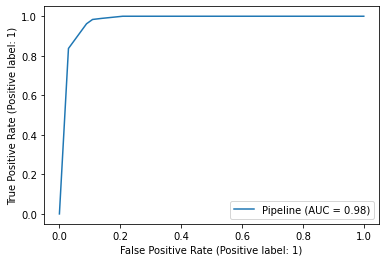

In [16]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train,y_train)
plot_roc_curve(knn_pipe, X_test, y_test)

*1.3 С помощью GridSearchCV произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели*

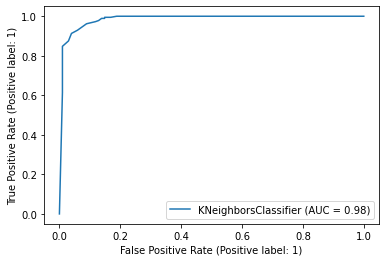

In [17]:
knn_params = {
    'n_neighbors': range(3, 33)
}
knn_gcv = GridSearchCV(KNeighborsClassifier(), knn_params, scoring="roc_auc")
knn_gcv.fit(X_knn_train, y_train)
plot_roc_curve(knn_gcv.best_estimator_, X_knn_test, y_test)

In [18]:
knn_gcv.best_estimator_

KNeighborsClassifier(n_neighbors=19)

*2.1 Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке*

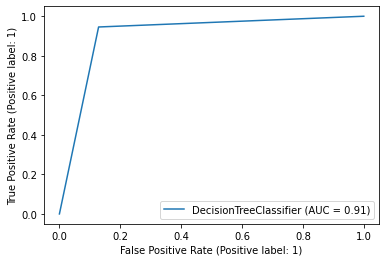

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
plot_roc_curve(dtree, X_test, y_test)

*2.2 С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)*

DecisionTreeClassifier(criterion='entropy', max_depth=32, max_features='log2')


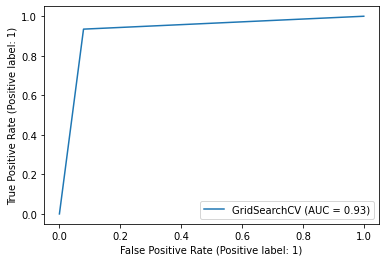

In [20]:
dtree_params = {
    'criterion': ('gini', 'entropy'),
    'max_depth': range(2, 33),
    'max_features': ('auto', 'sqrt', 'log2', None)
}
dtree_gcv = GridSearchCV(DecisionTreeClassifier(), dtree_params)
dtree_gcv.fit(X_train, y_train)
print(dtree_gcv.best_estimator_)
plot_roc_curve(dtree_gcv, X_test, y_test)

*2.3 Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности*

            feature  importance
6    concavity_mean    0.548596
23       area_worst    0.128328
22  perimeter_worst    0.095203


<AxesSubplot:xlabel='importance', ylabel='feature'>

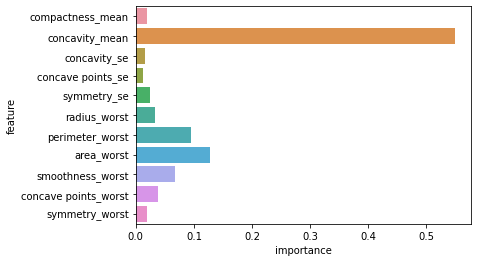

In [21]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': dtree_gcv.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
# нарисуем столбчатую диаграмму только c теми признаками, у которых значимсоть больше 0
sns.barplot(data=features_importance_df[features_importance_df['importance'] > 0], y="feature", x="importance")

*3.1 Продемонстрировать работу случайного леса `RandomForestClassifier`*

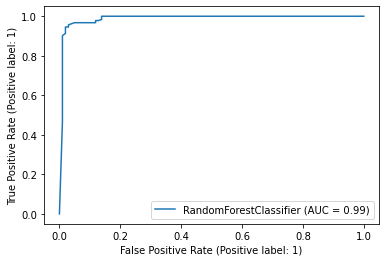

In [22]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
plot_roc_curve(random_forest, X_test, y_test)

*3.2 С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики*

RandomForestClassifier(criterion='entropy', n_estimators=22)


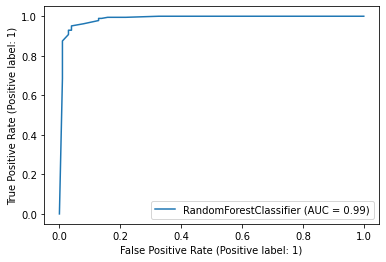

In [23]:
rf_params = {
    "n_estimators": range(2, 50),
    "criterion": ("gini", "entropy")
}
rf_gcv = GridSearchCV(RandomForestClassifier(), rf_params)
rf_gcv.fit(X_train, y_train)
print(rf_gcv.best_estimator_)
plot_roc_curve(rf_gcv.best_estimator_, X_test, y_test)

                 feature  importance
27  concave points_worst    0.155477
22       perimeter_worst    0.131116
20          radius_worst    0.088698


<AxesSubplot:xlabel='importance', ylabel='feature'>

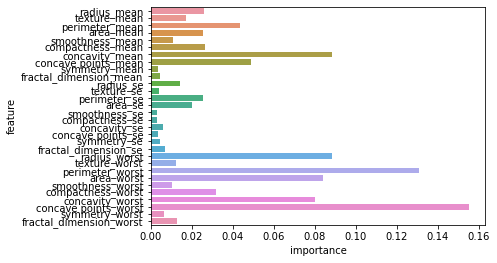

In [24]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': rf_gcv.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
sns.barplot(data=features_importance_df[features_importance_df['importance'] > 0], y="feature", x="importance")

## Выводы:

*1) Самой точной моделью оказался `RandomForest(criterion='entropy', n_estimators=22)`.*

*2) `RandomForest` и `DecisionTreeClassifier` не нуждаются в нормализации.*

*3) Для каждой модели каждый из признаков имеет свою значимость.*